# Tarea 11.1

1. Implementar un SVM para clasificar los siguientes datasets: make_moons, make_circles y make_bloobs, para ello se deberá crear un grid search.
2. Con los mejores párametros dibujar  las fronteras de clasificación
3. Con los mejores parámetros dibujar la matriz de confusion

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2]:
#  Libraries for draw contours
def make_meshgrid(x, y, h=0.02):
    """Crear una malla de puntos para trazar la frontera de decisión

    Parámetros
    ----------
    x: datos en los que se basa la malla del eje x
    y: datos en los que se basa la malla del eje y
    h: tamaño de la malla, opcional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Trazar los límites de decisión para un clasificador.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: un clasificador
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: diccionario de parámetros para pasar a contourf, opcional
    """
    X_grid = np.c_[xx.ravel(), yy.ravel()]    # Aplanamos la malla para aplicar el modelo
    Z = clf.predict(X_grid)
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [3]:
def clasificacion(X, y, name):
  # Separamos los datos en entrenamiento y prueba
  # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

  # split(data a estratificar, variable_objetivo)
  for train_index, test_index in split.split(X, y):
    X_train, y_train = X[train_index], y[train_index]     # Entrenamiento (80%)
    X_test, y_test = X[test_index], y[test_index]         # Prueba (20%)

  # X1, X2 = X_train[:, 0], X_train[:, 1]     # Características
  # y_c = y_train
  X1, X2 = X_test[:, 0], X_test[:, 1]     # Características
  y_c = y_test

  ''' ------------------ Búsqueda del estimador SVC más óptimo ------------------'''
  # Definimos el modelo de clasificación: SVM
  # Buscamos los parámetros más óptimos para el clasificador
  params = {
      'kernel': ('linear','rbf','poly','sigmoid'),
      'C': [0.01, 0.1, 1.0, 10, 15],
      'gamma': ['scale', 'auto', 0.01, 0.1, 1.0, 2]
      }

  # Utilizamos la métrica 'accuracy' por defecto del clasificador SVC
  search = GridSearchCV(estimator=SVC(), param_grid=params)
  search.fit(X_train, y_train)    # Preparamos el modelo con los datos de entrenamiento
  clf = search.best_estimator_

  print('* Parámetros del mejor estimador:', search.best_params_)
  # print('Accuracy (exactitud) del mejor estimador: %.4lf \n' %search.best_score_)
  print('* Accuracy (exactitud) del mejor estimador: %.4lf \n' %clf.score(X_train, y_train))

  clf.fit(X_train, y_train)

  ''' --------------------------- Matriz de confusión ---------------------------'''
  y_pred = clf.predict(X_test)
  cm = metrics.confusion_matrix(y_c, y_pred)

  print('* Métricas del estimador con los datos de prueba:')
  print(metrics.classification_report(y_c, y_pred))

  ''' ------- Gráficos de la clasificación de los datos de entrenamiento --------'''
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))
  fig.suptitle(f'Dataset {name}')

  # GRÁFICO : FRONTERAS DE CLASIFICACIÓN
  axes[0].set_title("Fronteras de decisión (Datos de prueba)")
  axes[0].plot(X1[y_c==0], X2[y_c==0], "bo", alpha=0.5, label='Clase 0')
  axes[0].plot(X1[y_c==1], X2[y_c==1], "ro", alpha=0.5, label='Clase 1')
  axes[0].set_xlabel(r"Característica: $X_1$")
  axes[0].set_ylabel(r"Característica: $X_2$")
  axes[0].legend()
  XX, YY = make_meshgrid(X1, X2)
  plot_contours(axes[0], clf, XX, YY, cmap=plt.cm.coolwarm, alpha=0.8)
  axes[0].legend()

  # Gráfico de la matriz de confusión
  axes[1].set_title("Matriz de confusión")
  disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(ax=axes[1])
  axes[1].grid(False)

  plt.show()

* Parámetros del mejor estimador: {'C': 1.0, 'gamma': 2, 'kernel': 'rbf'}
* Accuracy (exactitud) del mejor estimador: 0.9844 

* Métricas del estimador con los datos de prueba:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        40
           1       0.95      0.95      0.95        40

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



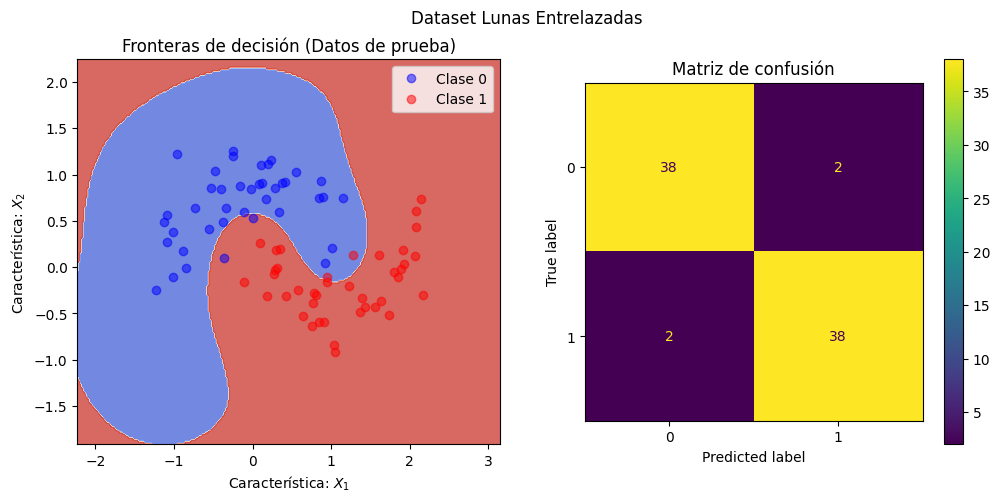

In [4]:
X, y = make_moons(n_samples=400, noise=0.2, shuffle=True, random_state=42)
clasificacion(X, y, 'Lunas Entrelazadas')

* Parámetros del mejor estimador: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
* Accuracy (exactitud) del mejor estimador: 0.9000 

* Métricas del estimador con los datos de prueba:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        40
           1       0.92      0.90      0.91        40

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



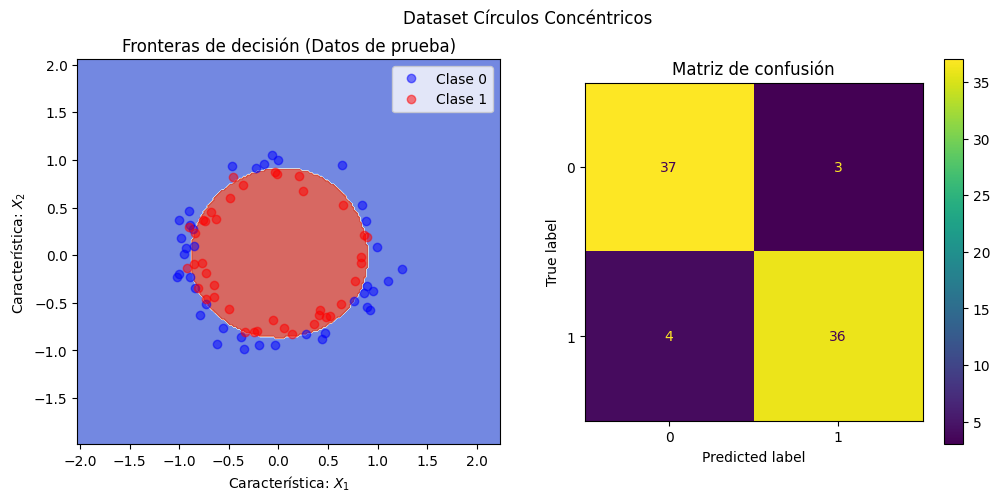

In [5]:
X, y = make_circles(n_samples=400, noise=0.08, shuffle=True, random_state=42)
clasificacion(X, y, 'Círculos Concéntricos')

* Parámetros del mejor estimador: {'C': 0.01, 'gamma': 'auto', 'kernel': 'poly'}
* Accuracy (exactitud) del mejor estimador: 0.9938 

* Métricas del estimador con los datos de prueba:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        60
           1       0.98      0.98      0.98        60

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



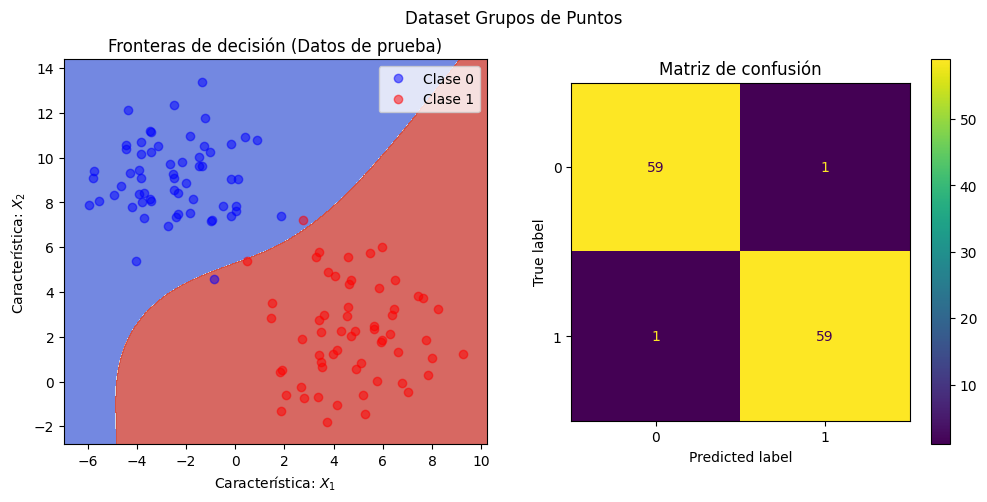

In [6]:
X, y = make_blobs(n_samples=600, centers=2, n_features=2, \
                  cluster_std=[2,2], shuffle=True, random_state=42)
# cluster_std: Agrega una varianza a los datos de cada grupo
clasificacion(X, y, name='Grupos de Puntos')

* Parámetros del mejor estimador: {'C': 15, 'gamma': 'scale', 'kernel': 'rbf'}
* Accuracy (exactitud) del mejor estimador: 0.9667 

* Métricas del estimador con los datos de prueba:
              precision    recall  f1-score   support

           0       0.90      0.98      0.93        44
           1       0.98      0.89      0.93        46

    accuracy                           0.93        90
   macro avg       0.94      0.93      0.93        90
weighted avg       0.94      0.93      0.93        90



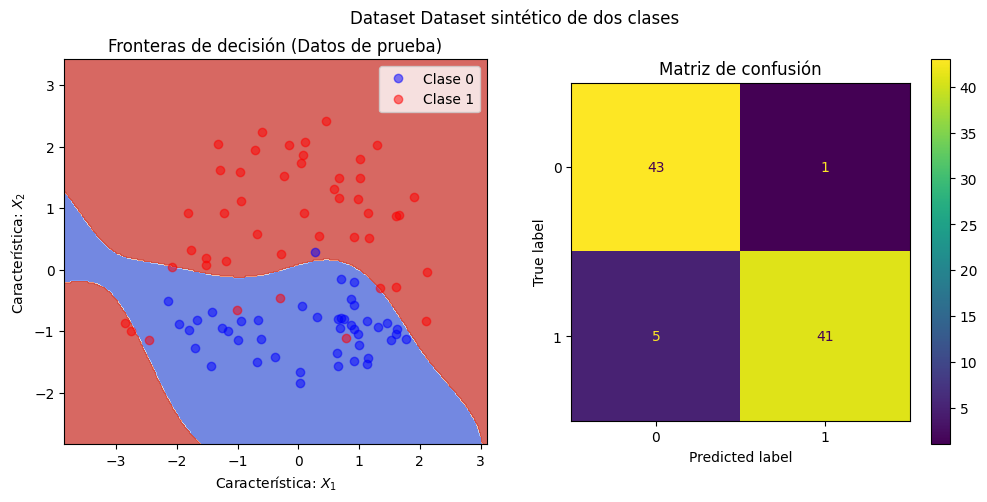

In [7]:
X, y = make_classification(n_samples=450, n_features=2, n_redundant=0, n_informative=2, \
                           random_state=42, n_clusters_per_class=2, shuffle=True)
'''
  n_redundant:
    Este parámetro controla el número de características redundantes (correlacionadas
    con las características informativas). Al aumentar n_redundant, se introduce indirectamente más
    ruido o superposición, ya que las características redundantes pueden dificultar la separación clara de las clases.

  n_clusters_per_class:
    Este parámetro controla el número de grupos o clusters por clase. Si se
    establece en un valor mayor que 1, se crean múltiples clusters para cada clase, lo que puede
    aumentar la superposición y hacer la clasificación más difícil.
'''
clasificacion(X, y, name='Dataset sintético de dos clases')